<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter5_NeuralNetwork/Section5.2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Section 5.2 – Artificial Neural Network**
This notebook contains all demo codes in Section 5.2.

### Implementation

![alt text](https://docs.google.com/uc?export=download&id=1oWrlu3M05rP8GzEWU23EgTZpDiFj2Mop)



*   Input layer ( $h^{0}$): $h^{0}(x) = x$.
*  Hidden layer ($\{h^{l}\}_{l = 1}^{L-1}$);
* Output layer ($h^{L}$).

\begin{eqnarray*}
z^{l+1} &=& {\color{blue}W^{l}} h^{l} + {\color{blue}b^{l}},\\
h^{l+1} &=& {\color{red} \sigma}(z^{l+1}),
\end{eqnarray*}
where ${\color{red}\sigma}$ is an* activation function*, which is usually non-linear, e.g. the sigmoid function $\sigma(x) = \frac{1}{1+e^{-x}}$. The parameter set ${\color{blue}\theta} = (W^{l}, b^{l})_{l =1}^{L}$}.


###ANN Classification###
The input $x$ is a multi-dimensional vector; 

The ouput $y$ is a one-hot respresenation of the class. 


The number of neurons in the output layer is the total number of classes. 

The $j^{th}$ neurons in the output layer represents the probability of the output(label) being class $j$.  

 The **cross entropy **loss function is defined as follows:

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N}\sum_{i =1}^{N} \sum_{k} \mathbb{1}( y_{i}=\text{ class }k) \log(p(y_{i} =\text{ class }k \vert x_{i})) 
\end{eqnarray*}

Note: The cross entropy between two probability distributions $p$ and $q$ is defined as 
\begin{eqnarray*}
H(p, q) =- \sum_{x} p(x)\log(q(x)).
\end{eqnarray*}

$L(\theta \vert \mathcal{D}) $ can be reformulated as 

\begin{eqnarray*}
L(\theta \vert \mathcal{D}) = - \frac{1}{N} \langle  y_{i}, \log(p_{\theta }(  \cdot \vert x_{i})) \rangle 
\end{eqnarray*}


#Pipelines of Supervised Learning Algorithms# 

The piplelines of the supervised learning algorithms are summarized as follows:

1.   Import Datasets;
2.   Take a look at the dataset (Statistical Analysis/Visualization);
3.    Pre-process the dataset to prepare for the training process (normalization/reshape data);
4.    Train a model;
5.    Validate a model;
6.    Cross Validation. 


** We will apply the shallow neural network to the MNIST dataset as a concrete example to go through the pipelines of supervised learning algorithm.**

Problem: Build an algorithm to identify the digit label from the handwritten image using the MNIST dataset. 

![alt text](http://corochann.com/wp-content/uploads/2017/02/mnist_plot.png)

## **Pre-process MNIST Dataset**

In [2]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Import MNIST dataset
(x_mnist_train, y_mnist_train), (x_mnist_test, y_mnist_test) = mnist.load_data()

# Reshape input image data from matrixs to vectors
[n_samples_train, width, height] = np.shape(x_mnist_train)
[n_samples_test, width, height] = np.shape(x_mnist_test)
x_train = x_mnist_train.reshape([n_samples_train, width*height]).astype('float32')
x_test = x_mnist_test.reshape([n_samples_test, width*height]).astype('float32')

# Normalize the dataset
x_train /= 255
x_test /= 255

# Convert class vectors to one-hot vector matrices
num_classes = 10    
y_train = to_categorical(y_mnist_train, num_classes)
y_test = to_categorical(y_mnist_test, num_classes)

## **Implement ANN for Digit Classification**

In [3]:
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# In the MINST data, the input dim = 784 and the output dim = 10 
def shallow_NN_model(n_hidden_neurons, output_dim = 10, input_dim = 784):
    start_time = time.time()
    print('Compiling Model ... ')
    model = Sequential()
    # Add a hidden layer with ReLU activation function
    model.add(Dense(n_hidden_neurons, activation='relu', input_dim = input_dim))
    # Add an output layer with softmax activation function for multi-classification problem
    model.add(Dense(output_dim, activation = 'softmax'))
    sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print('Model compield in {0} seconds'.format(time.time() - start_time))
    return model
    
epochs = 100
batch  = 256
n_hidden_neurons = 50
model = shallow_NN_model(n_hidden_neurons)
hist_ANN = model.fit(x_train, y_train, epochs=epochs, batch_size=batch, validation_data=(x_test, y_test), verbose=2)

Compiling Model ... 
Model compield in 5.806873559951782 seconds
Epoch 1/100
235/235 - 4s - loss: 0.3537 - accuracy: 0.8971 - val_loss: 0.1995 - val_accuracy: 0.9412
Epoch 2/100
235/235 - 1s - loss: 0.1687 - accuracy: 0.9509 - val_loss: 0.1521 - val_accuracy: 0.9554
Epoch 3/100
235/235 - 1s - loss: 0.1295 - accuracy: 0.9624 - val_loss: 0.1262 - val_accuracy: 0.9633
Epoch 4/100
235/235 - 1s - loss: 0.1086 - accuracy: 0.9674 - val_loss: 0.1318 - val_accuracy: 0.9612
Epoch 5/100
235/235 - 1s - loss: 0.0942 - accuracy: 0.9716 - val_loss: 0.1152 - val_accuracy: 0.9654
Epoch 6/100
235/235 - 1s - loss: 0.0847 - accuracy: 0.9743 - val_loss: 0.1070 - val_accuracy: 0.9682
Epoch 7/100
235/235 - 1s - loss: 0.0767 - accuracy: 0.9768 - val_loss: 0.0996 - val_accuracy: 0.9706
Epoch 8/100
235/235 - 1s - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.1122 - val_accuracy: 0.9670
Epoch 9/100
235/235 - 1s - loss: 0.0627 - accuracy: 0.9808 - val_loss: 0.1025 - val_accuracy: 0.9700
Epoch 10/100
235/235 - 1s 

## **Plot the Fitting Result**

In [4]:
import matplotlib.pyplot as plt

# Define functions to plot the loss and accuracy
def plot_hist_var(hist, str_var):
  plt.figure()
  plt.plot(hist.history[str_var], 'b', linewidth=1.5)
  plt.plot(hist.history['val_'+str_var], 'r', linewidth=1.5)
  plt.legend(['Training set','Testing set'])
  plt.xlabel('Epochs')
  plt.ylabel(str_var[0].upper()+str_var[1:])

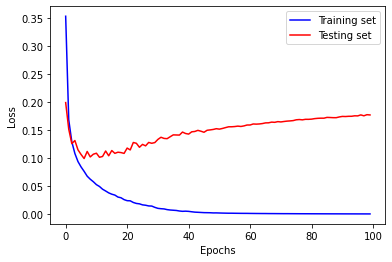

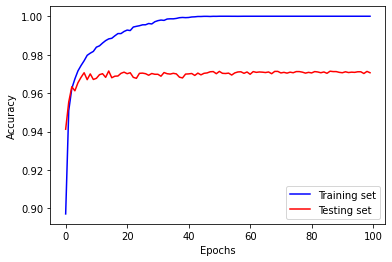

In [5]:
plot_hist_var(hist_ANN, 'loss')
plot_hist_var(hist_ANN, 'accuracy')

## **Assess the performance of a fitted model**



There are various measurements of the performance of the fitted models in classification problems.
*   Loss function and the accuracy;
*   Confusion matrix. 

In [6]:
score =  model.evaluate(x_test, y_test)
print(model.metrics_names)
print('Test ' + model.metrics_names[0] , score[0])
print('Test '+ model.metrics_names[1] , score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1775 - accuracy: 0.9706
['loss', 'accuracy']
Test loss 0.17745350301265717
Test accuracy 0.9706000089645386


In [7]:
from sklearn.metrics import confusion_matrix

Y_test_prob_pred = model.predict(x_test)
Y_test_class_pred = np.argmax(model.predict(x_test), axis=-1)

print(Y_test_class_pred)
cm = confusion_matrix( y_mnist_test, Y_test_class_pred )
labels = np.arange(10)

[7 2 1 ... 4 5 6]


Confusion matrix, without normalization
[[ 959    1    0    0    0    4    6    2    3    5]
 [   0 1126    3    1    0    2    1    1    1    0]
 [   4    2  998    6    5    0    4    5    8    0]
 [   1    1    5  977    1    6    2    3    5    9]
 [   2    0    2    0  955    2    6    3    3    9]
 [   4    1    0   15    2  857    4    1    4    4]
 [   4    3    2    1    5    3  937    0    3    0]
 [   1    3    8    5    2    1    0  998    3    7]
 [   6    0    5    8    6    6    3    4  930    6]
 [   5    2    0    8    9    5    1    7    3  969]]
Normalized confusion matrix
[[9.78571429e-01 1.02040816e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.08163265e-03 6.12244898e-03 2.04081633e-03
  3.06122449e-03 5.10204082e-03]
 [0.00000000e+00 9.92070485e-01 2.64317181e-03 8.81057269e-04
  0.00000000e+00 1.76211454e-03 8.81057269e-04 8.81057269e-04
  8.81057269e-04 0.00000000e+00]
 [3.87596899e-03 1.93798450e-03 9.67054264e-01 5.81395349e-03
  4.84496124e-03 0.000000

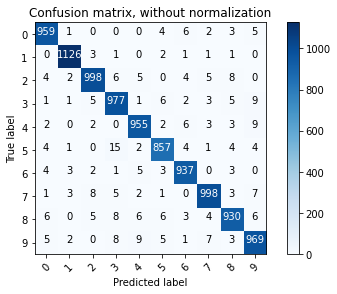

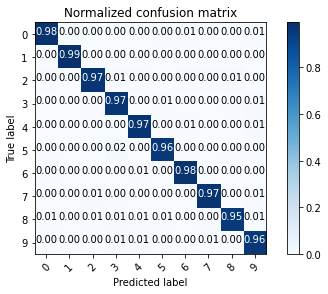

In [8]:
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b = 0)

## The code for the function plot_confusion_matrix() is attributed to http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, classes=list(map(str, labels)), normalize=True, title='Normalized confusion matrix')
